# Typical El Nino and La Nina SST composites (DJF)
1. Calculate Nino3.4 index
2. Calculate seasonal SSTs for DJF
3. Define El Nino year and La Nina year from nino3.4 anomalies
4. Take average of all El Nino years, La Nina years, and neutral years from SST dataset
5. Plot respective rainfall patterns

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in datasets
ersst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1854_2019.nc')

In [3]:
#Select varaibles
sst = ersst_ds.sst

In [4]:
#Calculate ersst Nino3.4 index (Not normalised, just anom)
nino_region = sst.sel(lat=slice(5,-5), lon=slice(190,240))
nino_clim = nino_region.sel(time=slice('1950-01', '1979-12')).mean(dim='time')
nino34 = (nino_region - nino_clim).mean(dim='lat').mean(dim='lon')

In [5]:
seasonyear = (sst.time.dt.year + (sst.time.dt.month//12))
sst.coords['seasonyear'] = seasonyear
nino34.coords['seasonyear'] = seasonyear

In [6]:
def seasonal_mean(data):
    return data.groupby('time.season').mean()

In [7]:
yearly_seasonal_sst = sst.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_nino34 = nino34.groupby('seasonyear').apply(seasonal_mean)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [8]:
#Select DJF
nino34_djf = yearly_seasonal_nino34.sel(season='DJF')
sst_djf = yearly_seasonal_sst.sel(season='DJF')

#Find nino years
elnino = nino34_djf.where(nino34_djf > 0.5, drop = True)
lanina = nino34_djf.where(nino34_djf < -0.5, drop = True)
neutral = nino34_djf.where((nino34_djf > -0.5) & (nino34_djf < 0.5), drop = True)

#Find typical SSTs for nino years
nino_sst = sst_djf.where(sst_djf.seasonyear.isin(elnino.seasonyear.values), drop = True).mean(dim='seasonyear')
nina_sst = sst_djf.where(sst_djf.seasonyear.isin(lanina.seasonyear.values), drop = True).mean(dim='seasonyear')
neutral_sst = sst_djf.where(sst_djf.seasonyear.isin(neutral.seasonyear.values), drop = True).mean(dim='seasonyear')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


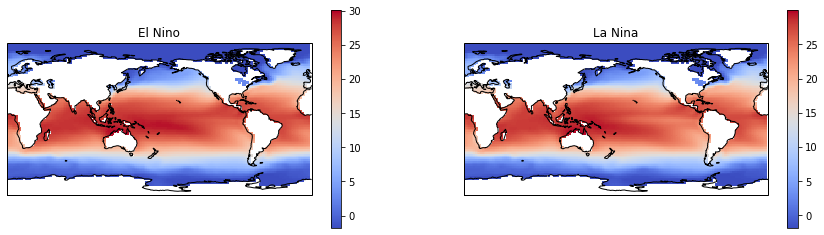

In [9]:
#Plot typical SST patterns 

f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nino_sst.lon, nino_sst.lat, nino_sst, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('El Nino')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nina_sst.lon, nina_sst.lat, nina_sst, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('La Nina')

f.set_figwidth(15)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


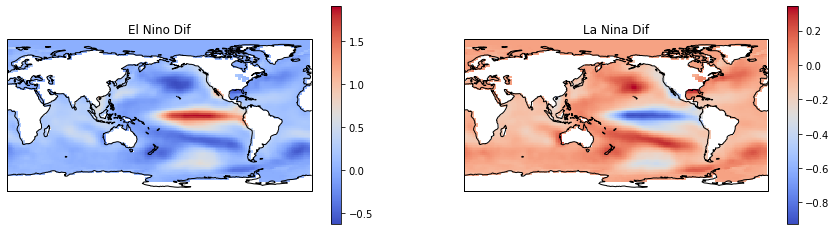

In [10]:
#Plot difference

mean = sst_djf.mean(dim='seasonyear')

nino_dif = nino_sst - mean
nina_dif = nina_sst - mean

f = plt.figure()

ax = f.add_subplot(121, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nino_dif.lon, nino_dif.lat, nino_dif, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('El Nino Dif')

ax = f.add_subplot(122, projection=ccrs.PlateCarree(180))
im = ax.pcolormesh(nina_dif.lon, nina_dif.lat, nina_dif, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
plt.colorbar(im, ax=ax)
ax.set_title('La Nina Dif')

f.set_figwidth(15)